In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb as n_choose_k

from disp import set_plot

In [2]:
data_mft = np.load('data/multistability/n_active_mft.npy', allow_pickle=True)[0]
data_full = np.load('data/multistability/n_active_full.npy', allow_pickle=True)[0]

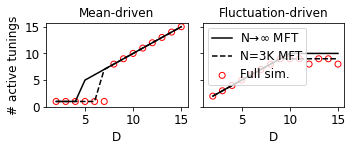

In [3]:
DS_MFT = data_mft['DS']
N_MFT = data_mft['N']

QS_MD_MFT_FIN = data_mft['q_med_mds_fin']
QS_MD_MFT_INF = data_mft['q_med_mds_inf']

QS_FD_MFT_FIN = data_mft['q_med_fds_fin']
QS_FD_MFT_INF = data_mft['q_med_fds_inf']

DS_FULL = data_full['DS']
QS_MD_FULL = data_full['q_med_mds']
QS_FD_FULL = data_full['q_med_fds']

fig, axs = plt.subplots(1, 2, figsize=(5, 2.2), tight_layout=True, sharey=True)
# mean-driven
axs[0].plot(DS_MFT, QS_MD_MFT_INF, c='k')
axs[0].plot(DS_MFT, QS_MD_MFT_FIN, c='k', ls='--')
axs[0].scatter(DS_FULL, QS_MD_FULL, facecolors='none', edgecolors='r')
set_plot(axs[0], title='Mean-driven', font_size=14)

axs[1].plot(DS_MFT, QS_FD_MFT_INF, c='k')
axs[1].plot(DS_MFT, QS_FD_MFT_FIN, c='k', ls='--')
axs[1].scatter(DS_FULL, QS_FD_FULL, facecolors='none', edgecolors='r')
set_plot(axs[1], title='Fluctuation-driven', font_size=14)

axs[0].set_ylabel('# active tunings')

axs[1].legend([r'N$\to \infty$ MFT', f'N={int(N_MFT/1000)}K MFT', 'Full sim.'], loc='upper left')

for ax in axs:
    ax.set_xlim(left=1)
    ax.set_ylim(bottom=0)
    set_plot(ax, x_label='D')
    
fig.savefig('figs/main/3_multi_n_active_vs_d.svg')

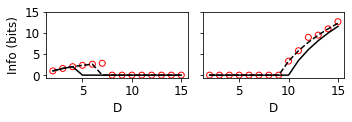

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(5, 1.8), tight_layout=True, sharey=True)
axs[0].plot(DS_MFT, np.log2(n_choose_k(DS_MFT, QS_MD_MFT_INF)), c='k')
axs[0].plot(DS_MFT, np.log2(n_choose_k(DS_MFT, QS_MD_MFT_FIN)), c='k', ls='--')
axs[0].scatter(DS_FULL, np.log2(n_choose_k(DS_FULL, QS_MD_FULL)), facecolors='none', edgecolors='r')

axs[1].plot(DS_MFT, np.log2(n_choose_k(DS_MFT, QS_FD_MFT_INF)), c='k')
axs[1].plot(DS_MFT, np.log2(n_choose_k(DS_MFT, QS_FD_MFT_FIN)), c='k', ls='--')
axs[1].scatter(DS_FULL, np.log2(n_choose_k(DS_FULL, QS_FD_FULL)), facecolors='none', edgecolors='r')

axs[0].set_ylabel('Info (bits)')

for ax in axs:
    set_plot(ax, y_ticks=(0, 5, 10, 15), x_label='D')
fig.savefig('figs/main/3_state_info_vs_d.svg')